In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
with open('./data/ex2data1.txt', 'r') as f:  
    data = f.readlines()  #txt中所有字符串读入data  
datamat = []
for line in data:  
    odom = line.strip().split(',')        #将单个数据分隔开存好  
    numbers_float = list(map(float, odom)) #转化为浮点数  
    datamat.append(numbers_float)
datanp = np.array(datamat)
print(datanp.shape)
x = datanp[:,(0,1)].reshape((100,2))  
y = datanp[:,2].reshape((100,1))
y = y.astype(np.int32) 

(100, 3)


[[0.08848486095666885], [0.08053243905305862], [-10.3239107131958]]


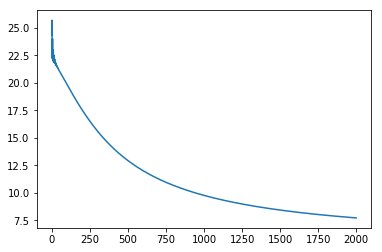

In [3]:
#创建占位符  
X=tf.placeholder(tf.float32, shape=(None, 2))  
Y=tf.placeholder(tf.float32, shape=(None, 1))  
  
#创建变量  
#tf.random_normal([1])返回一个符合正太分布的随机数  但这里效果不行 还是要初始化0 又不是nn不用担心梯度消失 
w=tf.Variable(tf.zeros([2,1],name='weight'))  
b=tf.Variable(tf.zeros([1],name='bias'))  

y_predict=tf.sigmoid(tf.add(tf.matmul(X,w),b)) 

cost=tf.reduce_sum(tf.pow(y_predict-Y,2.0))
lr=0.01  
optimizer=tf.train.AdamOptimizer(lr).minimize(cost)  

init = tf.global_variables_initializer()

cost_list = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(optimizer,feed_dict={X:x,Y:y})
        cost_list.append(sess.run(cost,feed_dict={X:x,Y:y}))
    ww,bb = sess.run(w),sess.run(b)
    
final_theta = ww.tolist()
final_theta.append(bb.tolist())
print(final_theta)
pd.Series(cost_list).plot()
plt.show()

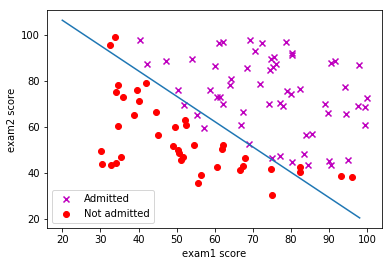

In [4]:
def plotLR(final_theta,x,y):
    final_theta = np.array(final_theta)
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    pos = np.where(y[:,0]==1.) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==0.)
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'm')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    plt.legend([ax1, ax2], ['Admitted', 'Not admitted'])
    plotX = np.arange(20,100,2)
    plotY = (-final_theta[2]-final_theta[0]*plotX)/final_theta[1] 
    plt.plot(plotX,plotY)
    plt.show()
    
plotLR(final_theta,x,y)